#Solution of Assignment_5
#Instructor: Gopal Hazra
#Computational Physics-PHY617, Dept of Physics, IIT Kanpur



<font size="5">Question 1</font>

<font size="3">
$$ f(x) = 2.0 \exp(-x^2) \cos(2 \pi x)$$
</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

No. of data points = 2
Interpolated value = 1.43109 at x = 0.45
Error in the interpolated value = 2.9845e+00, %error = 192.1246



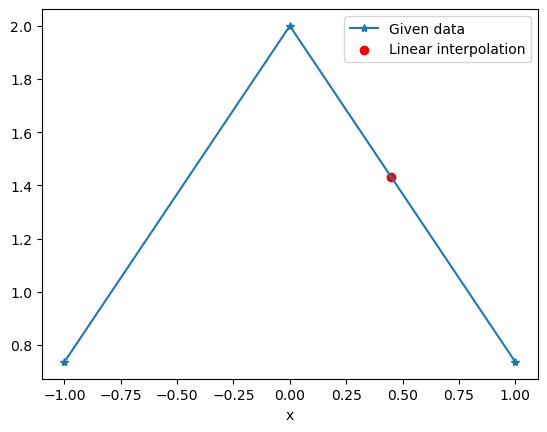

No. of data points = 4
Interpolated value = -1.20184 at x = 0.45
Error in the interpolated value = 3.5159e-01, %error = 22.6331



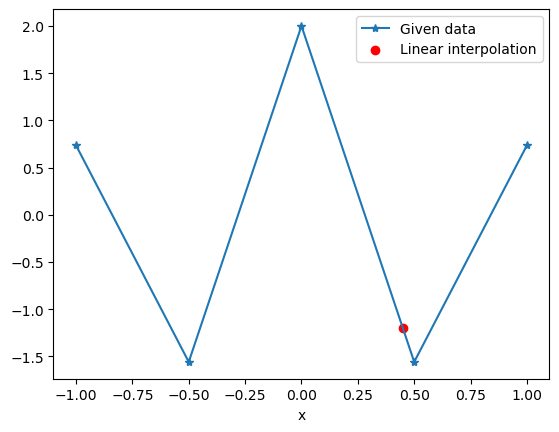

No. of data points = 8
Interpolated value = -1.24608 at x = 0.45
Error in the interpolated value = 3.0735e-01, %error = 19.7852



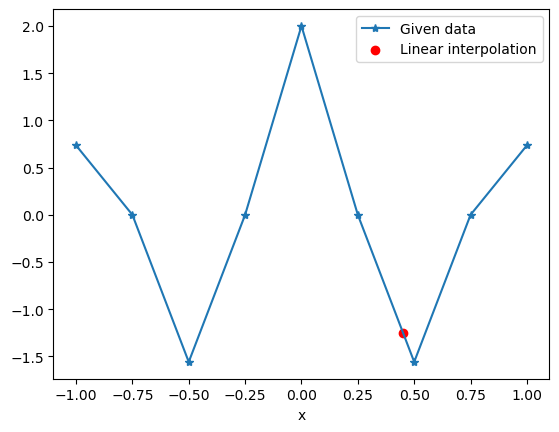

No. of data points = 16
Interpolated value = -1.42604 at x = 0.45
Error in the interpolated value = 1.2739e-01, %error = 8.2008



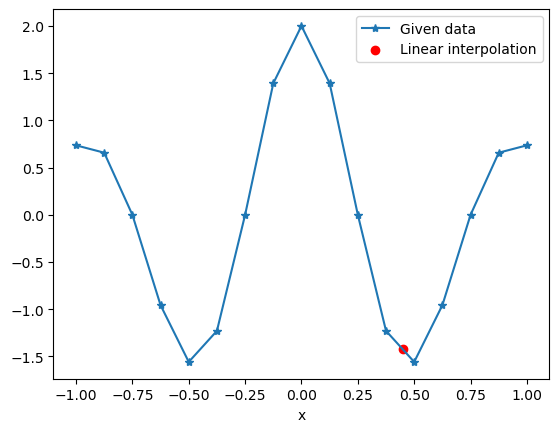

In [71]:
def fun1(x):
    return 2.0*np.exp(-x**2)*np.cos(2*np.pi*x)

##### Linear interpolation
def linear_interpol(x_interp, x_array, y_array):
    y_interp = y_array[0] + (x_interp - x_array[0])*(y_array[0] - y_array[1])/(x_array[0]-x_array[1])
    return y_interp
    #### y = y[0] + (x - x[0])*(y[0] - y[1])/(x[0] - x[1])

def error(f,x,y):
    err = abs(f(x) - y)
    err_p = (abs(err/f(x)))*100
    return err, err_p

x0 = 0.45
Q = np.array([2,4,8,16])

for q in Q:
    x = np.linspace(-1,1,q+1)
    y = fun1(x)
    for i in range(len(x)):
        if (x0 == x[i]):
            y0 = y[i]
            print(f"From the data, f({x0})={y0}")
            break
        elif ( (x[i] < x0 < x[i+1]) ):
            x_arr = np.array([x[i], x[i+1]])
            y_arr = np.array([y[i], y[i+1]])
            y0 = linear_interpol(x0, x_arr, y_arr)
            err0, err_p0 = error(fun1,x0,y0)
            print(f"No. of data points = {q}")
            print(f"Interpolated value = {y0:0.5f} at x = {x0}")
            print(f'Error in the interpolated value = {err0:0.4e}, %error = {err_p0:0.4f}\n')
            break
            
    plt.plot(x,y,marker='*')
    plt.scatter(x0,y0,marker='o',color='red')
    plt.xlabel('x')
    plt.legend(('Given data','Linear interpolation'),loc = 0)
    plt.show()

<font size="5">Question 2</font>

<font size="3">Lagrange's interpolation :
$$ p_L(x) = \sum_{k=0}^{n} y_k L_k(x) $$
$$ \text{where} \;\; L_k(x) = \prod_{i=0,i \neq k}^{n} \frac{x - x_i}{x_k - x_i} $$
</font>

In [48]:
###### Part (2a)

def Lk(x,k,xp,yp):
    p = 1.0
    for i in range(len(xp)):
        if (i!=k):
            p = p*(x - xp[i])/(xp[k] - xp[i])
    return p

def pL(x,xp,yp):
    p = 0.0
    for i in range(len(xp)):
        p = p + yp[i]*Lk(x,i,xp,yp)
    return p

0, |pL(x0) - y0| = 0.0
1, |pL(x1) - y1| = 0.0
2, |pL(x2) - y2| = 0.0
3, |pL(x3) - y3| = 0.0
4, |pL(x4) - y4| = 0.0
Interpolated value = 0.09855 at x = 0.10000,             error = 1.2860e-03, %error = 1.28818

Interpolated value = 0.41265 at x = 0.42684,             error = 1.3466e-03, %error = 0.32526

Interpolated value = 0.68425 at x = 0.75369,             error = 7.9301e-05, %error = 0.01159

Interpolated value = 0.88247 at x = 1.08053,             error = 2.6377e-04, %error = 0.02990

Interpolated value = 0.98673 at x = 1.40737,             error = 5.0543e-05, %error = 0.00512

Interpolated value = 0.98673 at x = 1.73422,             error = 5.0543e-05, %error = 0.00512

Interpolated value = 0.88247 at x = 2.06106,             error = 2.6377e-04, %error = 0.02990

Interpolated value = 0.68425 at x = 2.38791,             error = 7.9301e-05, %error = 0.01159

Interpolated value = 0.41265 at x = 2.71475,             error = 1.3466e-03, %error = 0.32526

Interpolated value = 0.09855 a

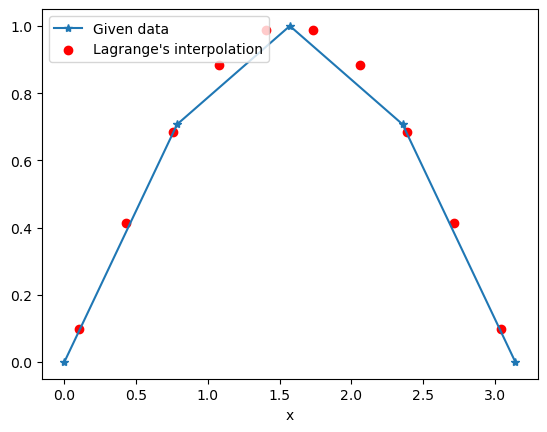

In [70]:
####### Part (2b)

def fun2(x):
    return np.sin(x)

def test_p_L(xp,yp):
    length = len(xp)
    for i in range(length):
        x0 = abs(pL(xp[i],xp,yp) - yp[i])
        print(f"{i}, |pL(x{i}) - y{i}| = {x0}")

x = np.linspace(0,np.pi,5)
y = fun2(x)

test_p_L(x,y)

#### Interpolating y at new points x
x_interp = np.linspace(0.1,np.pi-0.1,10)
len_x_interp = len(x_interp)
y_interp = np.zeros(len_x_interp)

for i in range(len_x_interp):
    y_interp[i] = pL(x_interp[i],x,y)
    err_i, err_i_p = error(fun2,x_interp[i],y_interp[i])
    print(f"Interpolated value = {y_interp[i]:0.5f} at x = {x_interp[i]:0.5f}, \
            error = {err_i:0.4e}, %error = {err_i_p:0.5f}\n")

plt.plot(x,y,marker='*')
plt.scatter(x_interp,y_interp,marker='o',color='red')
plt.xlabel('x')
plt.legend(('Given data','Lagrange\'s interpolation'),loc = 'upper left')
plt.show()

<font size="5">Question 3</font>

| **x** | 0.00 | 0.50 | 1.00 | 1.50 | 2.00 |
|-------|------|------|------|------|------|
| **y** | -1.00 | 1.75 | 4.00 | 5.75 | 7.00 |


Interpolated value = 3.0955 at x = π/4

Interpolated values using Lagrange's method and Neville's method, respectively:
At x = 0.00, y_lag = -1.0000, y_nev = -1.0000
At x = 0.20, y_lag = 0.1600, y_nev = 0.1600
At x = 0.40, y_lag = 1.2400, y_nev = 1.2400
At x = 0.60, y_lag = 2.2400, y_nev = 2.2400
At x = 0.80, y_lag = 3.1600, y_nev = 3.1600
At x = 1.00, y_lag = 4.0000, y_nev = 4.0000
At x = 1.20, y_lag = 4.7600, y_nev = 4.7600
At x = 1.40, y_lag = 5.4400, y_nev = 5.4400
At x = 1.60, y_lag = 6.0400, y_nev = 6.0400
At x = 1.80, y_lag = 6.5600, y_nev = 6.5600
At x = 2.00, y_lag = 7.0000, y_nev = 7.0000


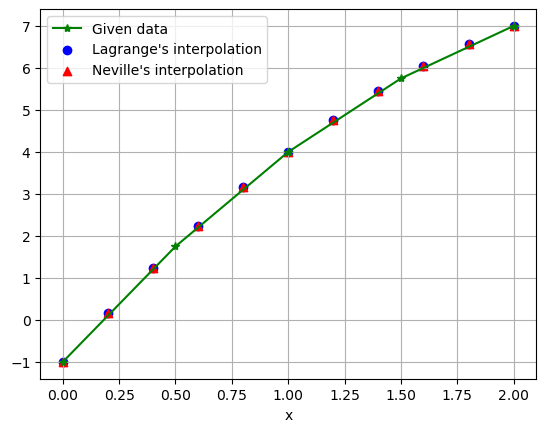

In [123]:
x_data = np.array([0.00, 0.50,1.00,1.50,2.00])
y_data = np.array([-1.00,1.75,4.00,5.75,7.00])

##### Part (3a)
def neville(x,xData,yData):
    m = len(xData)   # number of data points
    y = yData.copy()
    for k in range(1,m):
        y[0:m-k] = ((x - xData[k:m])*y[0:m-k] +      \
                    (xData[0:m-k] - x)*y[1:m-k+1])/  \
                    (xData[0:m-k] - xData[k:m])  \

    return y[0]

y_interp = neville(np.pi/4,x_data,y_data)
print(f'Interpolated value = {y_interp:0.4f} at x = π/4')

##### Part (3b)
dx = 0.2
x_values = np.arange(0.0,2.0+dx,dx)
n_len = len(x_values)

y_values_lagrange = np.zeros(n_len)
for i in range(n_len):
    y_values_lagrange[i] = pL(x_values[i],x_data,y_data)

#### Part (3c)
y_values_neville = np.zeros(n_len)
for i in range(n_len):
    y_values_neville[i] = neville(x_values[i],x_data,y_data)

print("\nInterpolated values using Lagrange\'s method and Neville\'s method, respectively:")
for i in range(n_len):
    print(f"At x = {x_values[i]:0.2f}, y_lag = {y_values_lagrange[i]:0.4f}, y_nev = {y_values_neville[i]:0.4f}")

plt.plot(x_data, y_data, marker='*', color='green')
plt.scatter(x_values, y_values_lagrange, marker='o', color='blue')
plt.scatter(x_values, y_values_neville, marker='^', color='red')
plt.legend(('Given data','Lagrange\'s interpolation', 'Neville\'s interpolation'),loc = 'upper left')
plt.xlabel('x')
plt.grid()
plt.show()